# Degradation

By combining data from more than 1500 second-life cells that were deployed on battery storage devices powered by Relectrify technology, we present a cycle life model for over 4000 thousand full charge-discharge cycles. We also use this model to show the expected cycle life of a ReVolve given the assumptions that were presented in [this](https://relectrify.atlassian.net/wiki/spaces/LOG/pages/2284879999/ReVolve+initial+pack+SOH+calculation) page.  

In [ ]:
%matplotlib widget
import os
from os.path import dirname, abspath, join

import pandas as pd

import helper

path_to_data = join(dirname(abspath('')), 'data')

The data used in this report was generated from over hundreds of charge and discharge cycles from tests conducted with our partner organizations -- Counties Energy, Dynamic Manufacturing and American Electric Power. We extract the linear degradation trend for each cell based on the their reported SOH over hundreds of cycles. We then concatenated each trend and computed the average and standard deviation for overlaps in the trends. The result of this method is shown in the diagram below.  

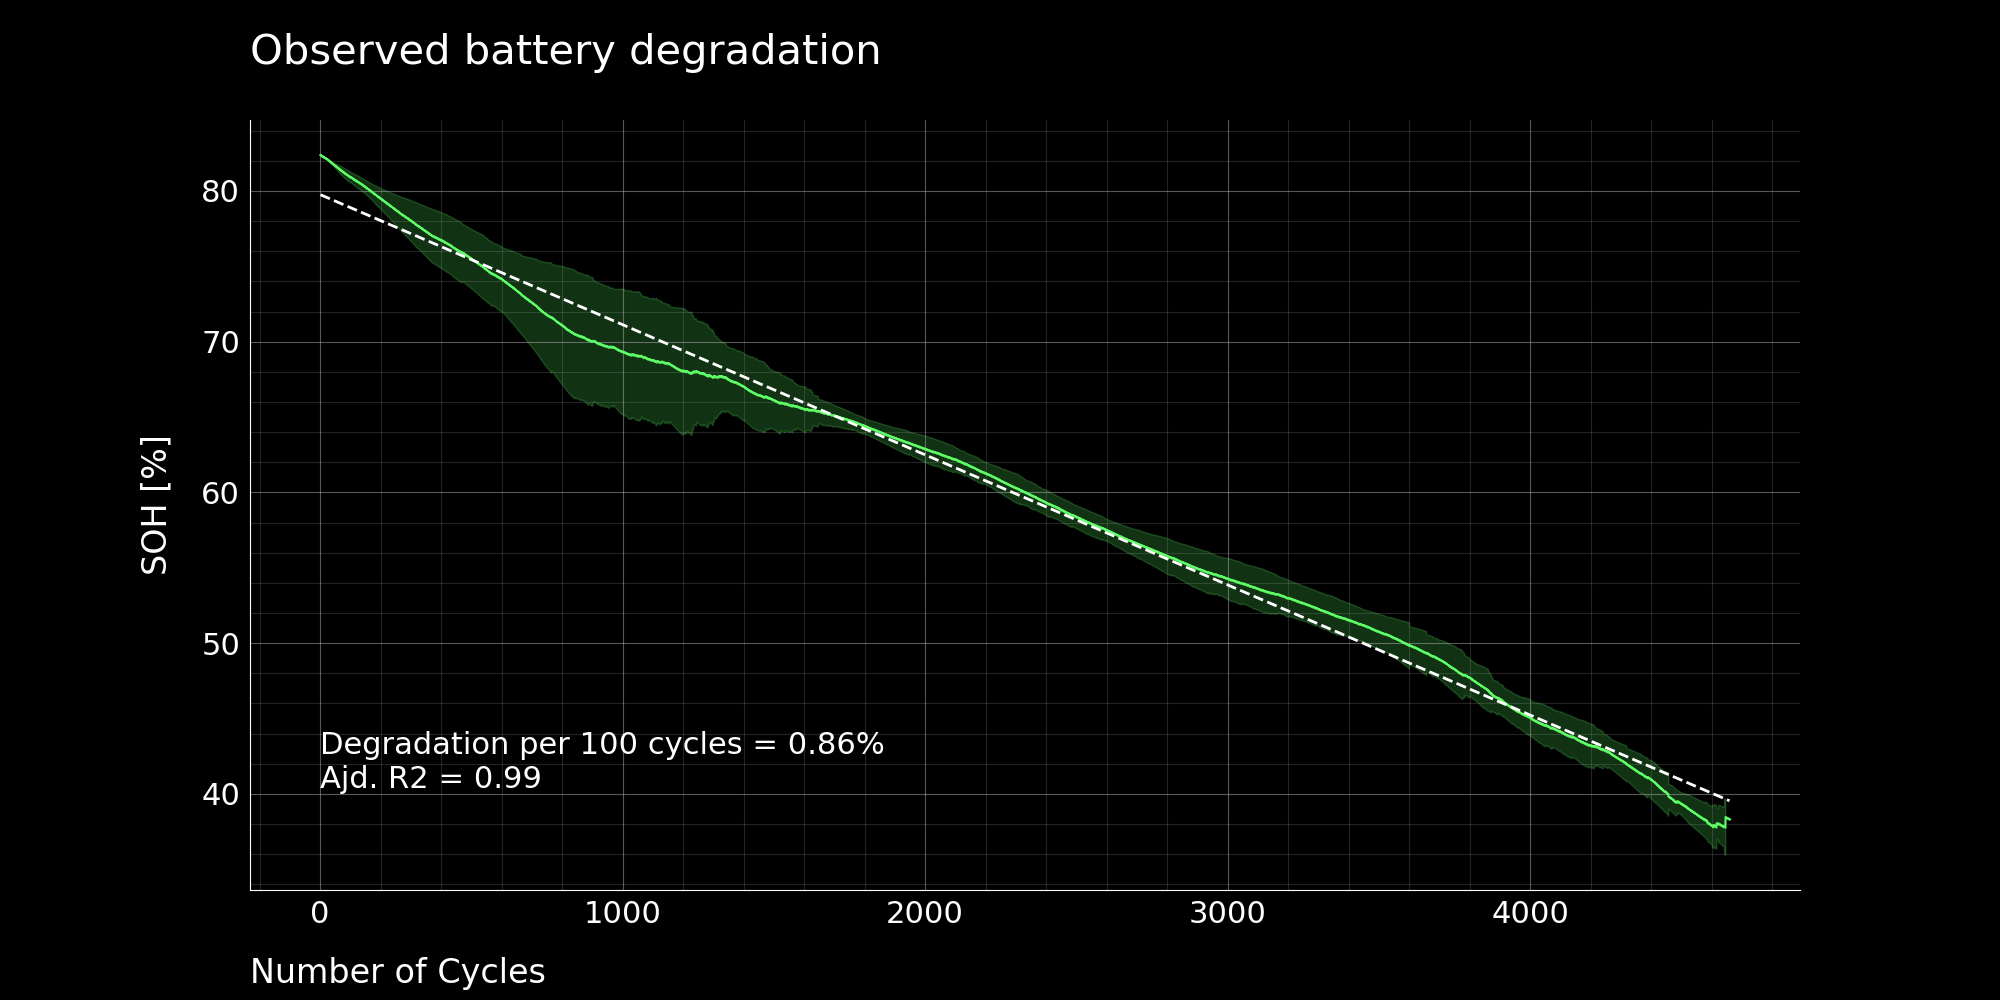

In [ ]:
# load data from source
data = pd.read_csv(join(path_to_data, 'average_degrdation_dataset.csv'))

# get model and range from model
mdl, std = helper.process_degradation_model(data)

# plot the model
helper.plot_degradation_model(mdl, std)

We now present the ReVolve expected lifetime based on the cycle life model above. The calculations and assumptions presented [here](https://relectrify.atlassian.net/wiki/spaces/LOG/pages/2284879999/ReVolve+initial+pack+SOH+calculation) show that the ReVolve will have 120 kWh capacity if the pack's average SOH is at 60%. Additionally, we also expect the ReVolve to have at least 2000 cycles before having an end-of-life capacity of 78 kWh (65% of 120 kWh). 

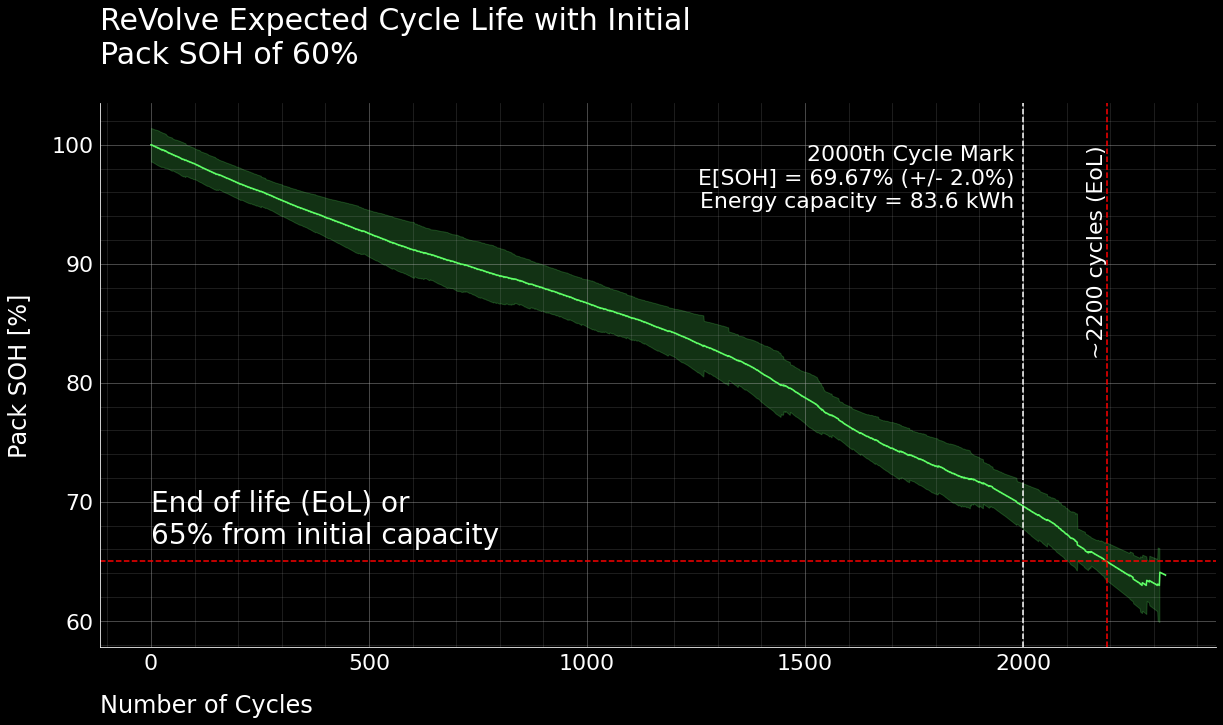

In [ ]:
mdl_revolve, std_revolve = helper.process_revolve_model(mdl, std, init_soh=60)

helper.plot_revolve_model(mdl_revolve, std_revolve, eol_pct=65, init_cap_kwh=120)